# Laboratorium 10 - Dyskretna Transformacja Fouriera (Wojciech Kosztyła)

In [100]:
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt
from scipy.linalg import dft
import time

np.set_printoptions(precision=2, suppress=True)

### Zadanie 1 FFT

1. Zaimplementuj funkcję realizującą DFT jako iloczyn macierzy Fouriera $F_{n}$ i n-elementowego wektora wejściowego ($y = F_{n}x$).

$n = 2^{r}$

$[F_{n}]_{jk} = ξ^{jk}$

$ξ = e^{\frac{-2\pi i}{n}} = \cos(\frac{2\pi}{n}) - i\sin(\frac{2\pi}{n}) = \omega$

In [101]:
def DFT(x):
    n = len(x)
    F = np.array( [ [np.exp(-2 * np.pi * 1j * j * k/n) for j in range(n) ] for k in range(n)], dtype=np.complex_)
    return F@x

2. Zaimplementuj również IDFT korzystając z tożsamości:

$F_{n}^{-1}y = \frac{\overline{F}_{n}y}{n} = \frac{\overline{F_{n}\overline{y}}}{n}$

Sprawdź poprawność działania funkcji realizującej DFT stosując transformację odwrotną ($x = F_{n}^{-1}y$) oraz porównując uzyskane wyniki z wyjściem funkcji bibliotecznej.

In [102]:
def IDFT(y):
    n = len(y)
    F = np.array( [ [np.exp(-2 * np.pi * 1j * j * k/n) for j in range(n) ] for k in range(n)], dtype=np.complex_)
    return ( F@y.conj() ).conj()/n

In [103]:
wektor_x = np.array([1,2,8,0,4])
print("Wektor x: ", wektor_x)
print(" ")
print("DFT: Wynik mojej funkcji:          ", DFT(wektor_x))
print("DFT: Wynik funkcji bibliotecznej:  ", fft(wektor_x))
print(" ")
print("IDFT: Wynik mojej funkcji:         ", IDFT(wektor_x))
print("IDFT: Wynik funkcji bibliotecznej: ", ifft(wektor_x))
print(" ")
print("IDFT + DFT: Wynik mojej funkcji:         ", IDFT(DFT(wektor_x)))
print("IDFT + DFT: Wynik funkcji bibliotecznej: ", ifft(fft(wektor_x)))
print(" ")

Wektor x:  [1 2 8 0 4]
 
DFT: Wynik mojej funkcji:           [15.  +0.j   -3.62-2.8j  -1.38+8.78j -1.38-8.78j -3.62+2.8j ]
DFT: Wynik funkcji bibliotecznej:   [15.  +0.j   -3.62-2.8j  -1.38+8.78j -1.38-8.78j -3.62+2.8j ]
 
IDFT: Wynik mojej funkcji:          [ 3.  -0.j   -0.72+0.56j -0.28-1.76j -0.28+1.76j -0.72-0.56j]
IDFT: Wynik funkcji bibliotecznej:  [ 3.  +0.j   -0.72+0.56j -0.28-1.76j -0.28+1.76j -0.72-0.56j]
 
IDFT + DFT: Wynik mojej funkcji:          [ 1.-0.j  2.-0.j  8.-0.j -0.+0.j  4.+0.j]
IDFT + DFT: Wynik funkcji bibliotecznej:  [1.+0.j 2.+0.j 8.+0.j 0.+0.j 4.+0.j]
 


Jak widać, moje funkcje i funkcje biblioteczne zwracają praktycznie takie same wyniki.

3. Zaimplementuj rekurencyjny algorytm Cooleya-Turkeya realizujący szybką transformację Fouriera (FFT). Porównaj szybkość jego działania z implementacją biblioteczną oraz implementacją z mnożeniem wektora przez macierz $F_{n}$ dla danych o różnym rozmiarze.

In [104]:
def Cooley_Turkey(x):
    n = len(x)
    if n<=4:
        return DFT(x)
    else:
        x_1 = Cooley_Turkey(x[::2])     # co drugi
        x_2 = Cooley_Turkey(x[1::2])

        dodatek = np.exp(-2j * np.pi * np.arange(n) / n)
        return np.concatenate( [x_1 + dodatek[:n//2] * x_2, x_1 + dodatek[n//2:] * x_2] )

In [105]:
wektor_x_2 = np.array([0,5,3,2,6,23,3,6,1,4,3,4,5,3,4,7])
print(Cooley_Turkey(wektor_x_2))
print(fft(wektor_x_2))

[ 79.   +0.j    -6.86-16.92j -17.07+17.97j  19.38 +8.6j   -1.  -16.j
 -22.8  +5.18j  -2.93+15.97j   6.28-16.34j -29.   -0.j     6.28+16.34j
  -2.93-15.97j -22.8  -5.18j  -1.  +16.j    19.38 -8.6j  -17.07-17.97j
  -6.86+16.92j]
[ 79.   +0.j    -6.86-16.92j -17.07+17.97j  19.38 +8.6j   -1.  -16.j
 -22.8  +5.18j  -2.93+15.97j   6.28-16.34j -29.   +0.j     6.28+16.34j
  -2.93-15.97j -22.8  -5.18j  -1.  +16.j    19.38 -8.6j  -17.07-17.97j
  -6.86+16.92j]


<ipython-input-106-7b6a29816098>:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


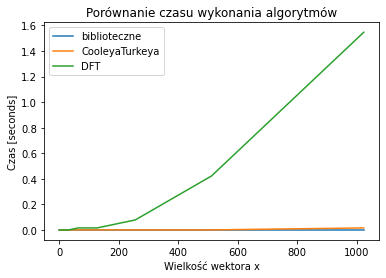

In [106]:
wielkosci_wektorow = np.array([1,2,4,8,16,32,64,128,256,512,1024])#,2048,4096,8192])
wektory = []

for wielkosc_wektora in wielkosci_wektorow:
    wektory.append( np.random.random(wielkosc_wektora) )

czasy_CooleyaTurkeya = []
czasy_biblioteczne = []
czasy_DFT = []

for wektor in wektory:
    start = time.process_time()
    Cooley_Turkey(wektor)
    czasy_CooleyaTurkeya.append( time.process_time() - start )

    start = time.process_time()
    fft(wektor)
    czasy_biblioteczne.append( time.process_time() - start )

    start = time.process_time()
    DFT(wektor)
    czasy_DFT.append( time.process_time() - start )


fig1, ax1 = plt.subplots()
ax1.set_title("Porównanie czasu wykonania algorytmów")
ax1.set_xlabel("Wielkość wektora x")
ax1.set_ylabel("Czas [seconds]")

ax1.plot(wielkosci_wektorow, czasy_biblioteczne, label="biblioteczne")
ax1.plot(wielkosci_wektorow, czasy_CooleyaTurkeya, label="CooleyaTurkeya")
ax1.plot(wielkosci_wektorow, czasy_DFT, label="DFT")
ax1.legend()
fig1.show()

Jak widać wyżej, implementacja Cooleya-Turkeya jest dużo lepsza, od DFT.
Funkcja zaimplementowana przeze mnie ma praktycznie tą samą złożoność, co biblioteczna.

### Zadanie 2 DFT w 1D

 - Wygeneruj dwa sygnały czasowo-amplitudowe:
  - Sygnał będący sumą pięciu sygnałów sinusoidalnych o różnych częstotliwościach
  - Sygnał złożony z pięciu sygnałów o tych samych częstotliwościach co w punkcie wyżej, ale ułożonych przedziałami, tzn. w każdym z pięciu przedziałów o tej samej szerokości występuje sygnał o jednej częstotliwości

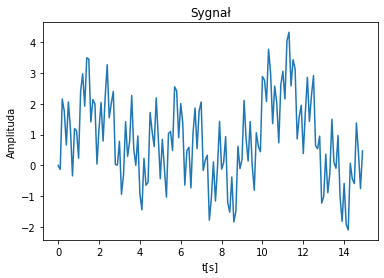

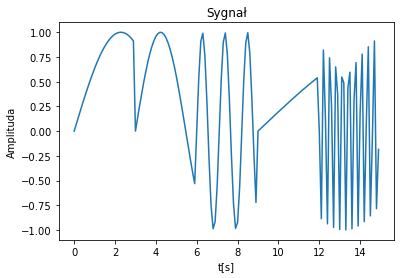

In [107]:
def sinus(zasieg, f, ilosc_punktow_na_jednostke_czasu = 10):     # A*sin(omega*t -kx + phi)    # okrojona to sin(omega*t)
    omega = np.pi * 2 * f
    t = np.arange(np.floor(zasieg * ilosc_punktow_na_jednostke_czasu)) / ilosc_punktow_na_jednostke_czasu
    return np.sin( omega * t )

def rysuj_sinus(zasieg, f, ilosc_punktow_na_jednostke_czasu = 10):
    fig1, ax1 = plt.subplots()
    ax1.set_title("Sygnał sinusoidalny")
    ax1.set_xlabel("t[s]")
    ax1.set_ylabel("Amplituda")

    punkty_x = np.arange(zasieg * ilosc_punktow_na_jednostke_czasu) / ilosc_punktow_na_jednostke_czasu
    ax1.plot(punkty_x, sinus(zasieg, f, ilosc_punktow_na_jednostke_czasu))

def rysuj_sygnal(zasieg, sygnal, ilosc_punktow_na_jednostke_czasu=10):
    fig1, ax1 = plt.subplots()
    ax1.set_title("Sygnał")
    ax1.set_xlabel("t[s]")
    ax1.set_ylabel("Amplituda")

    punkty_x = np.arange(zasieg * ilosc_punktow_na_jednostke_czasu) / ilosc_punktow_na_jednostke_czasu
    ax1.plot(punkty_x, sygnal)

def sygnal_A(zasieg, ilosc_punktow_na_jednostke_czasu=10):
    sygnal =    sinus(zasieg, 7/64, ilosc_punktow_na_jednostke_czasu)
    sygnal +=   sinus(zasieg, 13/64, ilosc_punktow_na_jednostke_czasu)
    sygnal +=   sinus(zasieg, 58/64, ilosc_punktow_na_jednostke_czasu)
    sygnal +=   sinus(zasieg, 2/64, ilosc_punktow_na_jednostke_czasu)
    sygnal +=   sinus(zasieg, 431/64, ilosc_punktow_na_jednostke_czasu)
    return sygnal

def sygnal_B(zasieg, ilosc_punktow_na_jednostke_czasu=10):
    sygnal =    sinus(zasieg, 0.0, ilosc_punktow_na_jednostke_czasu)
    il_pkt = len(sygnal)//5 #ilosc_punktow_na_przedzial
    sygnal[0*il_pkt:1*il_pkt] +=   sinus(zasieg/5, 7/64, ilosc_punktow_na_jednostke_czasu)
    sygnal[1*il_pkt:2*il_pkt] +=   sinus(zasieg/5, 13/64, ilosc_punktow_na_jednostke_czasu)
    sygnal[2*il_pkt:3*il_pkt] +=   sinus(zasieg/5, 58/64, ilosc_punktow_na_jednostke_czasu)
    sygnal[3*il_pkt:4*il_pkt] +=   sinus(zasieg/5, 2/64, ilosc_punktow_na_jednostke_czasu)
    sygnal[4*il_pkt:5*il_pkt] +=   sinus(zasieg/5, 431/64, ilosc_punktow_na_jednostke_czasu)
    return sygnal

rysuj_sygnal( 15, sygnal_A(15) )
rysuj_sygnal( 15, sygnal_B(15) )

 - Dokonaj transformacji sygnałów A i B do domeny częstotliwościowej, porównaj otrzymane wyniki. Przedstaw na osobnych wykresach część rzeczywistą i część urojoną wyniku transformacji.

Transformata Fouriera dla umożliwienia analizy częstotliwościowej przekształca sygnał z domeny czasu w domenę częstotliwości.

In [108]:
def rysuj_z_podzialem(y, ilosc_punktow_na_jednostke_czasu=10):
    zasieg = len(y)
    punkty_x = np.arange(zasieg * ilosc_punktow_na_jednostke_czasu) / ilosc_punktow_na_jednostke_czasu
    fig1, axis = plt.subplots(2, figsize=(14,7))
    axis[0].plot(punkty_x[:zasieg//2], np.real(y)[:zasieg//2])
    axis[1].plot(punkty_x[:zasieg//2], np.imag(y)[:zasieg//2])
    axis[0].set_title("Część rzeczywista")
    axis[1].set_title("Część urojona")

 #### Sygnał A (sygnał będący sumą pięciu sygnałów sinusoidalnych o różnych częstotliwościach)


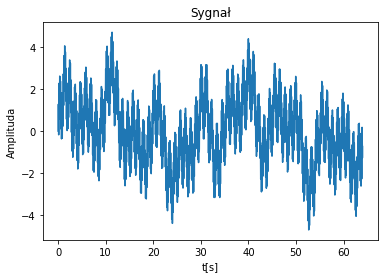

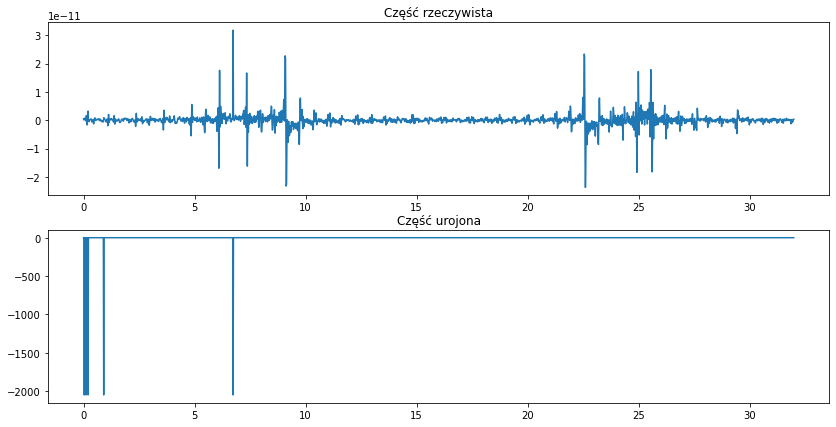

In [109]:
zasieg = 64
ss = 64

sygnal = sygnal_A(zasieg, ss)
rysuj_sygnal(zasieg, sygnal, ss)

sygnal_domena_f = Cooley_Turkey(sygnal)

rysuj_z_podzialem(sygnal_domena_f, ss)


 #### Sygnał B (sygnał złożony z pięciu sygnałów o tych samych częstotliwościach co w punkcie wyżej, ale ułożonych przedziałami, tzn. w każdym z pięciu przedziałów o tej samej szerokości występuje sygnał o jednej częstotliwości)

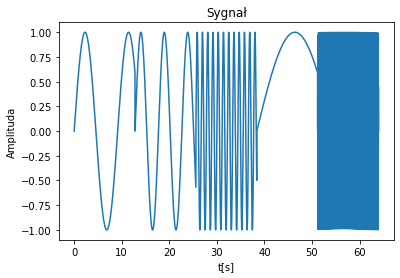

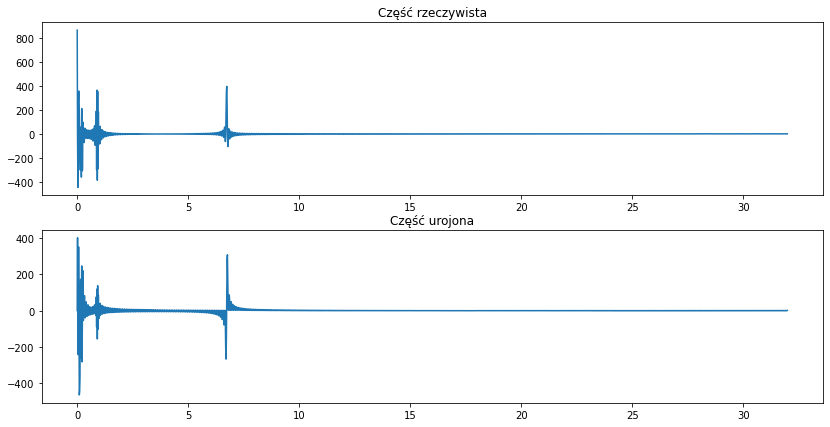

In [110]:
zasieg = 64
ss = 64

sygnal = sygnal_B(zasieg, ss)
rysuj_sygnal(zasieg, sygnal, ss)

sygnal_domena_f = Cooley_Turkey(sygnal)

rysuj_z_podzialem(sygnal_domena_f, ss)


Przy wcześniejszych danych nastąpił przeciek DFT.